# Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Functions 
**EN**  
Defining the function that we'll later use in our code  
**FR**  
On va définir les fonctions qu'on va utiliser plus tard dans le code pour les visualisations  


In [47]:
def ax_line_attribute_setter(ax_index, marker_index, line_index, marker,
                             markeredgecolor,marker_fill_color, markersize,
                             linewidth, color, linestyle):
    """
    Set the attributes of the marker and line for a given axis and line index.

    Parameters:
    -----------
    ax_index : int
        Index of the axis where the marker and line belong.
    marker_index : int
        Index of the marker in the axis.
    line_index : int
        Index of the line in the axis.
    marker : str
        Marker style to be used.
    markeredgecolor : str
        Color of the marker's edge.
    marker_fill_color : str
        Color of the marker's fill.
    markersize : int
        Size of the marker.
    linewidth : int
        Width of the line.
    color : str
        Color of the line.
    linestyle : str
        Style of the line.

    Returns:
    --------
    None
    """

    axes[ax_index].get_lines()[marker_index].set_marker(marker)
    axes[ax_index].get_lines()[marker_index].set_markerfacecolor(marker_fill_color)
    axes[ax_index].get_lines()[marker_index].set_markeredgecolor(markeredgecolor)
    axes[ax_index].get_lines()[marker_index].set_markersize(markersize)
    axes[ax_index].get_lines()[line_index].set_linewidth(linewidth)
    axes[ax_index].get_lines()[line_index].set_color(color)
    axes[ax_index].get_lines()[line_index].set_linestyle(linestyle)

def hist_plotter(data, x, kde, style, figsize, kde_line_color, bar_color, xlabel, ylabel, plot_title):
    sns.set_style(style)
    fig = plt.subplots(figsize=figsize)
    ax = sns.histplot(data = data, x = x, kde=kde, color=bar_color)
    ax.lines[0].set_color(kde_line_color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(plot_title)
    
def qq_plotter(data, col_of_interest, distribution, plot_title, plot_style):
    sns.set_style(plot_style)
    st.probplot(data[col_of_interest], dist=distribution, plot=plt)
    plt.title(plot_title)
    
def multi_col_hist_plotter(data, numb_cols, fig_sz, col1, col2, bin_widths, bin_colors, 
                           kdes, ax1_x_label, ax1_y_label, ax1_xlim, ax1_kde_line_color, 
                           ax2_x_label, ax2_y_label, ax2_xlim, ax2_kde_line_color, general_title):
    fig, axes = plt.subplots(ncols=numb_cols, figsize=fig_sz)
    sns.histplot(data=data, x=col1, binwidth=bin_widths[0], kde=kdes[0], ax=axes[0], color=bin_colors[0])
    axes[0].set(xlabel=ax1_x_label, ylabel=ax1_y_label)
    axes[0].set_xlim(ax1_xlim)
    axes[0].lines[0].set_color(ax1_kde_line_color)
    sns.histplot(data=data, x=col2, binwidth=bin_widths[1], kde=kdes[1], ax=axes[1], color=bin_colors[1])
    axes[1].set(xlabel=ax2_x_label, ylabel=ax2_y_label)
    axes[1].set_xlim(ax2_xlim)
    axes[1].lines[0].set_color(ax2_kde_line_color)
    plt.suptitle(general_title)

# Paris - Analysis

In [3]:
data = pd.read_csv("real_estate_PML.csv", sep = ",")
data = data.drop(columns="type_l")
df = data.set_index("ville").copy()
containers = [0,20,40,80,160,df['surface_m2'].max()]
df['largeur'] = pd.cut(df['surface_m2'], containers, labels = ['Très Petit', 'Petit', 'Moyen', 'Grand', 'Très Grand' ])
df_paris = df[df.index == 'Paris'].copy()
df_paris.describe()

,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
count,2921.000000,2921.000000,2921.000000,2921.000000,2.921000e+03,2921.000000
mean,13.765491,2.947963,1.508388,69.240381,8.919190e+05,12271.282438
std,4.810390,1.484404,1.176255,48.125717,8.947860e+05,3933.846575
min,2.000000,0.000000,0.000000,6.000000,6.000000e+04,2294.000000
25%,11.000000,2.000000,1.000000,38.600000,4.180000e+05,9983.000000
50%,15.000000,3.000000,1.000000,58.420000,6.400000e+05,11437.000000
75%,18.000000,4.000000,2.000000,86.000000,1.030000e+06,13626.000000
max,20.000000,11.000000,6.000000,427.600000,1.400000e+07,46005.000000


**EN**  
We'll calculate the relevant statistics for Paris for price/sqm and price: `Q1`, `Q2`, `Q3`, `Q4` (quantiles), `IQR` (interquantile range) and lower/upper bound for outliers.   
**FR**  
Nous allons calculer les statistiques pertinentes pour Paris pour le prix/m² et le prix : `Q1`, `Q2`, `Q3`, `Q4` (quantiles), `IQR` (intervalle interquartile) et les bornes inférieures/supérieures pour les valeurs aberrantes.


In [ ]:
q1_pmc, q2_pmc, q3_pmc, q4_pmc = df_paris['prix_m2'].quantile([0.25, 0.5, 0.75, 1])
q1_prix, q2_prix, q3_prix, q4_prix = df_paris['prix'].quantile([0.25, 0.5, 0.75, 1])
iqr_pmc = q3_pmc - q1_pmc
iqr_prix = q3_prix - q1_prix
lower_prix = q1_prix- 3*iqr_prix
upper_prix = q3_prix + 3*iqr_prix
lower_pmc = q1_pmc - 3*iqr_pmc
upper_pmc = q3_pmc + 3*iqr_pmc

## Distribution des prix/m2 

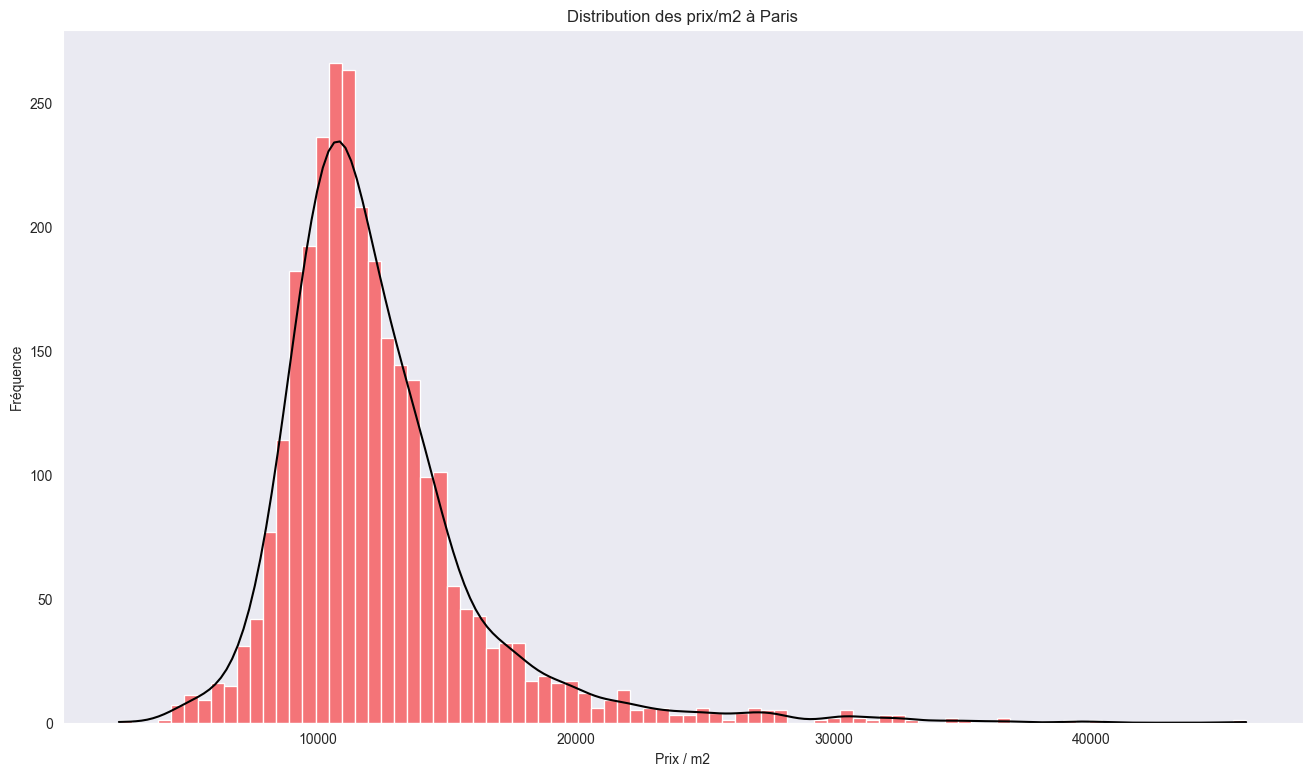

In [36]:
hist_plotter(df_paris, 'prix_m2', kde=True, 
             style='dark', figsize=(16,9), 
             kde_line_color='black', bar_color='red',
             xlabel='Prix / m2', ylabel='Fréquence', 
             plot_title='Distribution des prix/m2 à Paris')
plt.show()

**EN**  
We observe that there are some appartments with a price tag per square meter surpassing 20000 € which is quite **high** and almost twice bigger than the mean.  
**FR**  
Nous observons qu'il y a des appartements dont le prix par mètre carré dépasse 20000 €, ce qui est assez **élevé** et presque deux fois supérieur à la moyenne.

## Analyse de Normalité
**EN**  
A QQ plot (Quantile-Quantile plot) is a graphical tool used to compare the distribution of a dataset to a known probability distribution.

The QQ plot displays the quantiles of the dataset against the quantiles of the theoretical distribution on the vertical and horizontal axes, respectively. If the dataset is normally distributed, the points in the QQ plot should follow a straight line, indicating a good fit between the two distributions. If the points deviate significantly from the straight line, it suggests that the dataset is not normally distributed.  
**FR**  
Un graphique QQ (Quantile-Quantile) est un outil graphique utilisé pour comparer la distribution d'un ensemble de données à une distribution de probabilité connue.

Le graphique QQ affiche les quantiles de l'ensemble de données sur l'axe vertical et les quantiles de la distribution théorique sur l'axe horizontal. Si l'ensemble de données suit une distribution normale, les points sur le graphique QQ devraient suivre une ligne droite, indiquant un bon ajustement entre les deux distributions. Si les points s'écartent significativement de la ligne droite, cela suggère que l'ensemble de données ne suit pas une distribution normale.

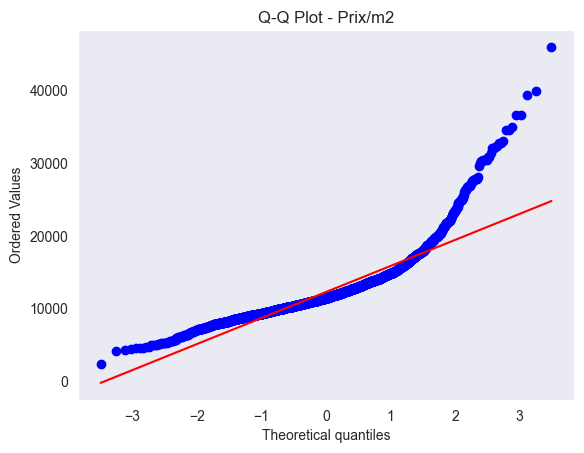

In [27]:
qq_plotter(df_paris, 'prix_m2', 'norm', 'Q-Q Plot - Prix/m2', 'dark')
plt.show()


## Log-transform
**EN**  

A log transform can be useful for machine learning on non-normally distributed data because it can help to normalize the data and make it more symmetric. This can be particularly beneficial for models that assume a normal distribution, such as linear regression.
When data is skewed, it can affect the accuracy of the model and lead to biased results. By applying a log transformation to the data, it can reduce the magnitude of extreme values and bring the distribution closer to a normal distribution. This can improve the model's performance and make it more robust to outliers.
Additionally, log transforms can also help to stabilize the variance of the data. This can be important for models that assume homoscedasticity, or equal variance across the range of predictors.  

**FR**  

Une transformation logarithmique peut être utile pour l'apprentissage automatique sur des données non distribuées de manière normale, car elle peut aider à normaliser les données et les rendre plus symétriques. Cela peut être particulièrement bénéfique pour les modèles qui supposent une distribution normale, tels que la régression linéaire.
Lorsque les données sont biaisées, cela peut affecter la précision du modèle et conduire à des résultats biaisés. En appliquant une transformation logarithmique aux données, cela peut réduire l'amplitude des valeurs extrêmes et rapprocher la distribution d'une distribution normale. Cela peut améliorer les performances du modèle et le rendre plus robuste aux valeurs aberrantes.
De plus, les transformations logarithmiques peuvent également aider à stabiliser la variance des données. Cela peut être important pour les modèles qui supposent une homoscédasticité, c'est-à-dire une variance égale sur l'ensemble des prédicteurs.

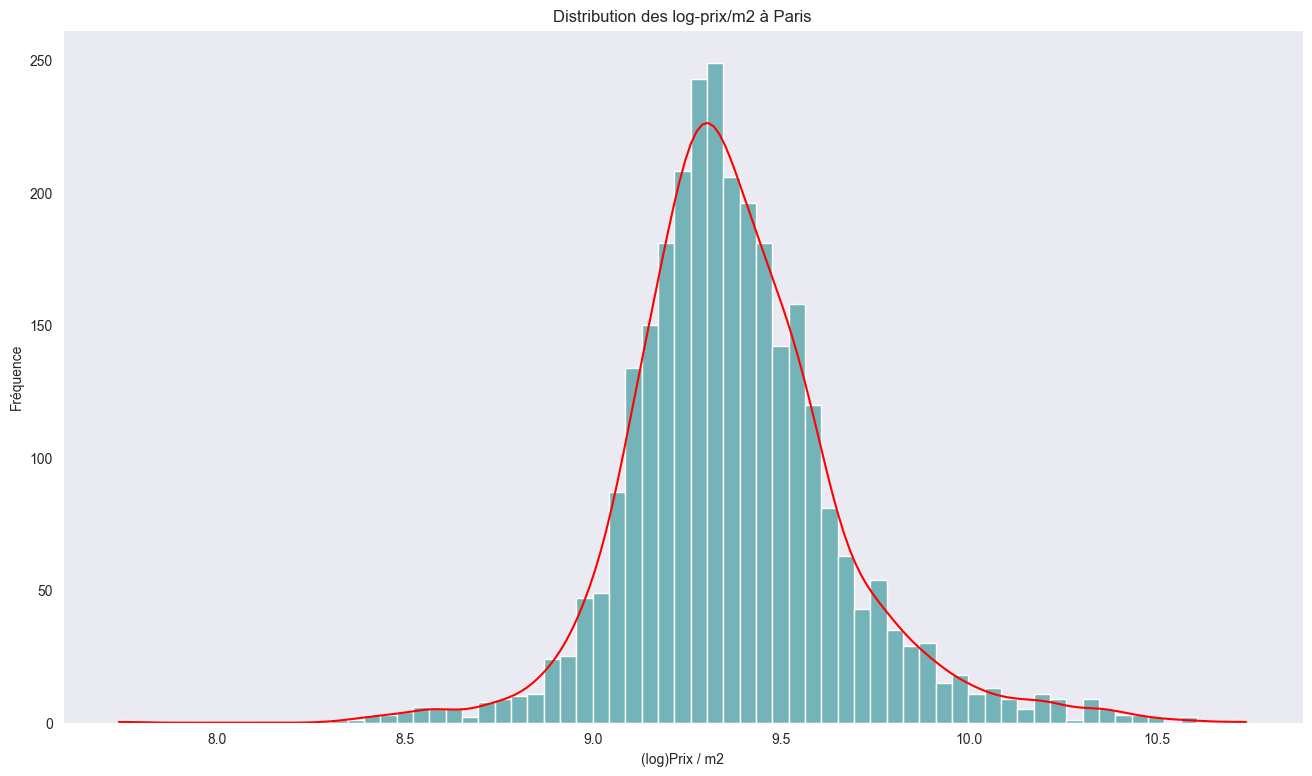

In [38]:
df_paris['prix_m2_log'] = np.log(df_paris['prix_m2'])
hist_plotter(df_paris, 'prix_m2_log', kde=True, 
             style='dark', figsize=(16,9), 
             kde_line_color='red', bar_color = 'teal',
             xlabel='(log)Prix / m2', ylabel='Fréquence', 
             plot_title='Distribution des log-prix/m2 à Paris')
ax.patches[0].set_facecolor('black')
plt.show()

**EN**  
After a log transform, the data seems to be less skewed and more centered around the (log) mean. We can see this below on the new Q-Q Plot. It might be useful to use a log-transform on the data if we think about applying a simple Linear Regression as our ML Model.  
**FR**  
Après une transformation logarithmique, les données semblent être moins biaisées et plus centrées autour de la moyenne (logarithmique). Nous pouvons le constater sur le nouveau graphique Q-Q ci-dessous. Il pourrait être utile d'utiliser une transformation logarithmique sur les données si nous envisageons d'appliquer une régression linéaire simple en tant que modèle d'apprentissage automatique.

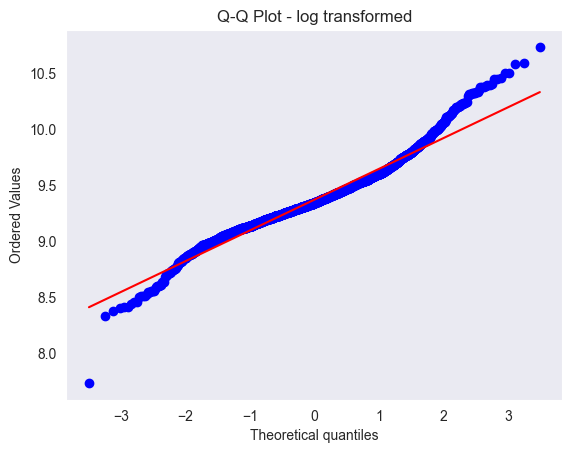

In [41]:
qq_plotter(df_paris, 'prix_m2_log', 'norm', 'Q-Q Plot - log transformed', 'dark')
plt.show()

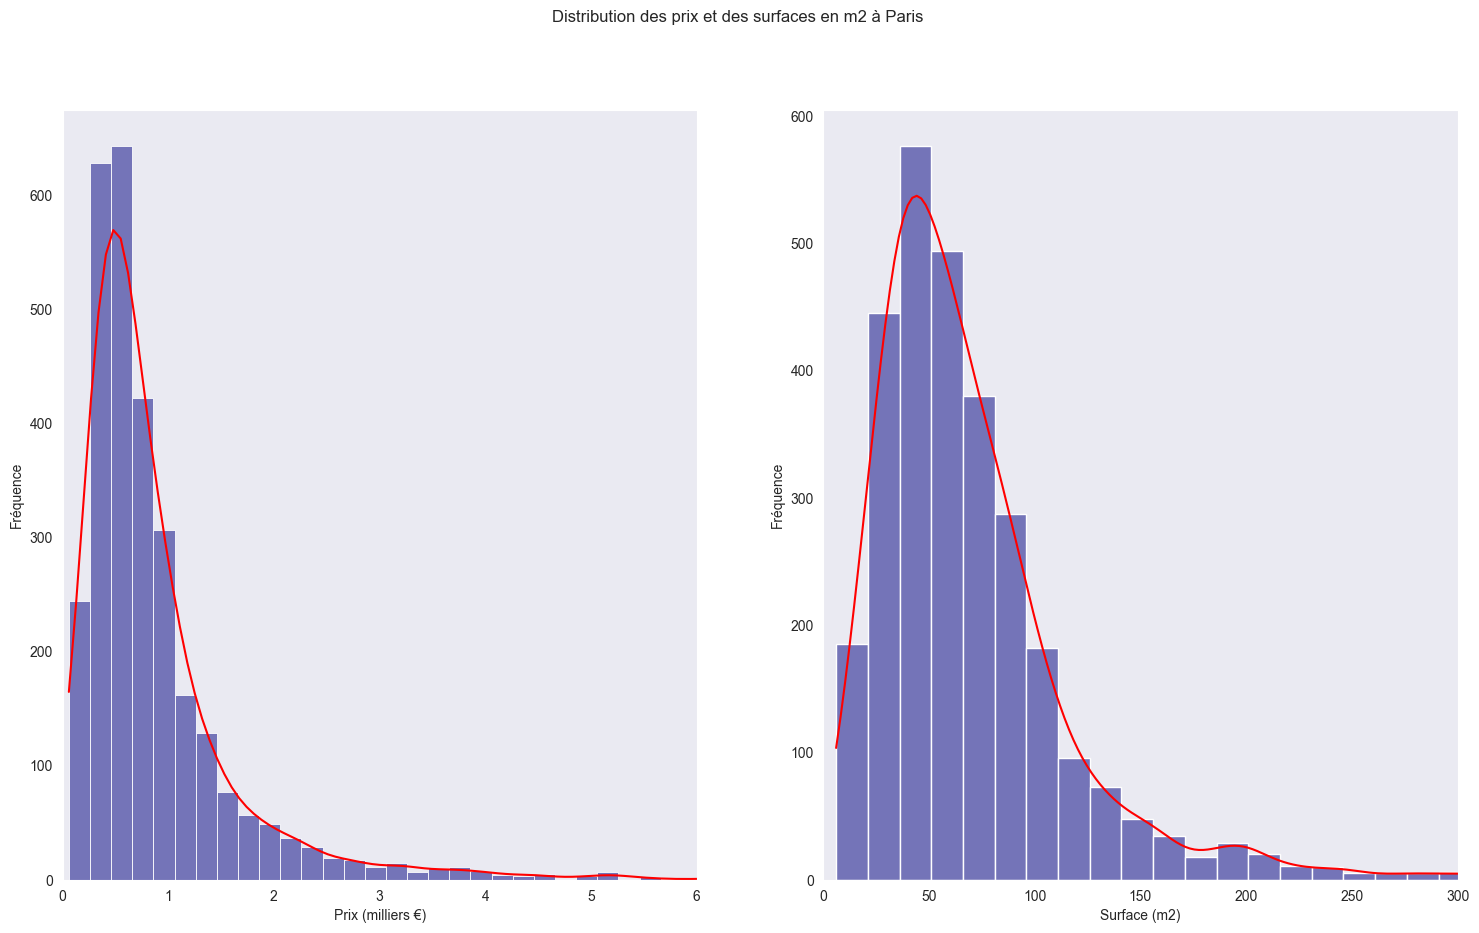

In [49]:
df_paris['prix_mil_euros'] = df_paris['prix']/1e6
multi_col_hist_plotter(data=df_paris, numb_cols=2, fig_sz=(18,10), col1='prix_mil_euros', col2='surface_m2', 
                       bin_widths=(0.2, 15), bin_colors=('navy', 'navy'), kdes=(True, True), 
                       ax1_x_label='Prix (milliers €)', ax1_y_label='Fréquence', ax1_xlim=(0,6), 
                       ax1_kde_line_color='red', ax2_x_label = 'Surface (m2)', ax2_y_label = 'Fréquence', 
                       ax2_xlim=(0,300), ax2_kde_line_color='red', general_title='Distribution des prix et des surfaces en m2 à Paris')
plt.show()

**EN**  
It looks like the prices are pretty right-skewed in Paris. The area is also right-skewed, but the skew is more mild. We'll analyze this further on the QQ-plots.  
**FR**  
Il semble que les prix soient assez biaisés vers la droite à Paris. La surface est également biaisée vers la droite, mais le biais est plus modéré. Nous allons analyser cela plus en détail sur les graphiques QQ.

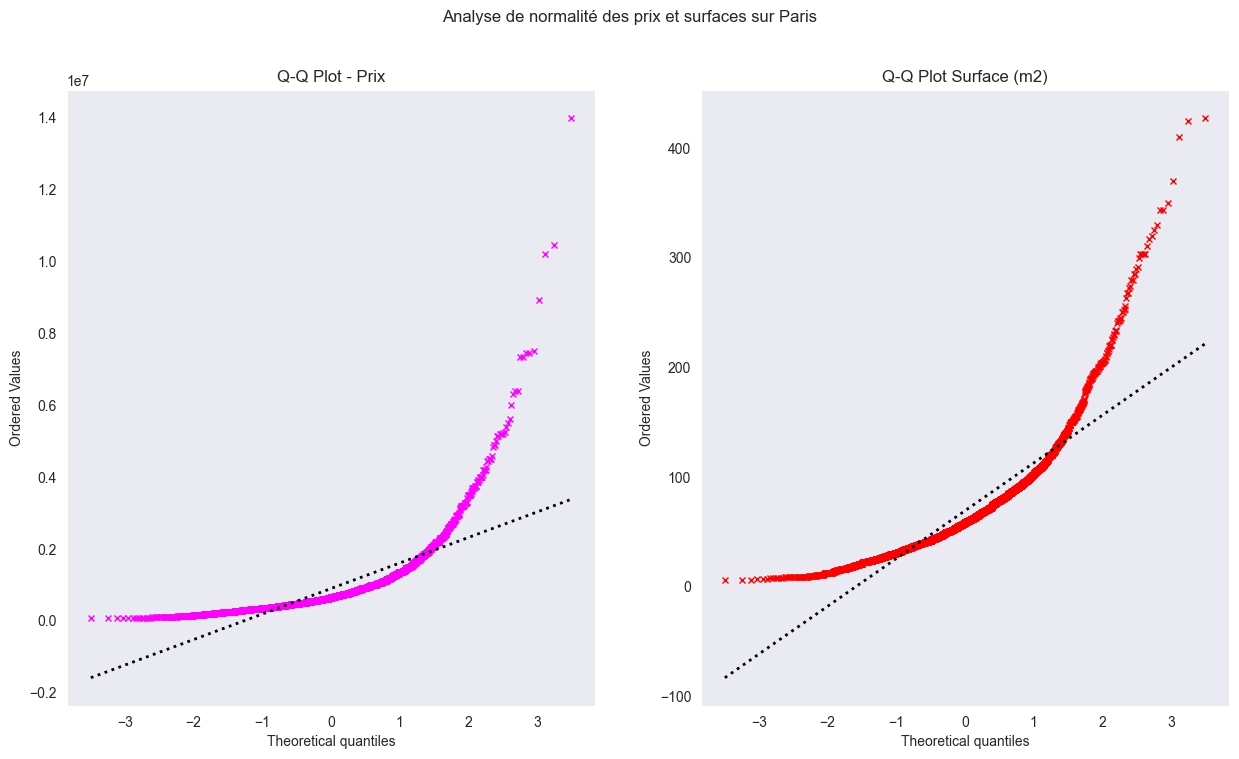

In [51]:
sns.set_style("dark")
fig, axes = plt.subplots(ncols = 2, figsize=(15,8))
st.probplot(df_paris['prix'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité des prix et surfaces sur Paris")
axes[0].set_title("Q-Q Plot - Prix")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='magenta',
                         marker_fill_color='magenta', markersize=5,
                         linewidth=2, color='black', linestyle='dotted')
st.probplot(df_paris['surface_m2'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot Surface (m2)")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='red',
                         marker_fill_color='red',markersize=5,
                         linewidth=2, color='black', linestyle='dotted')
plt.show()

**EN**  
We'll do again a log-transform for the columns `prix` and `surface_m2` to see if we can ***normalize*** the distribution.  
**FR**  
Nous allons de nouveau effectuer une transformation logarithmique sur les colonnes `prix` et `surface_m2` pour voir si nous pouvons ***normaliser*** la distribution.

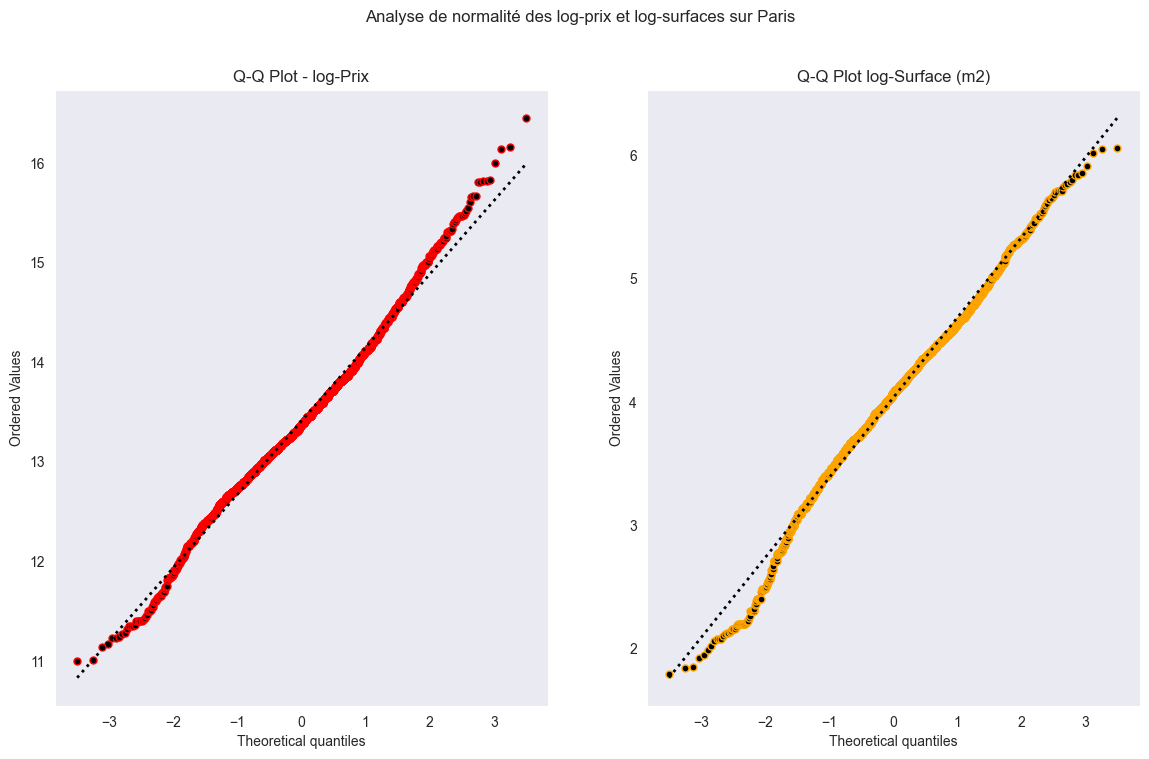

In [52]:
df_paris['log_prix'], df_paris['log_surface'] = np.log(df_paris['prix']), np.log(df_paris['surface_m2'])
sns.set_style("dark")
fig, axes = plt.subplots(ncols = 2, figsize=(14,8))
st.probplot(df_paris['log_prix'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité des log-prix et log-surfaces sur Paris")
axes[0].set_title("Q-Q Plot - log-Prix")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1, marker='o',
                         marker_fill_color='black', markeredgecolor='red',
                         markersize=5, linewidth=2, color='black', linestyle='dotted')
st.probplot(df_paris['log_surface'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot log-Surface (m2)")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1, marker='o',
                         markeredgecolor='orange', markersize=5, linewidth=2,
                         marker_fill_color='black', color='black', linestyle='dotted')
plt.show()

### Perfect!  
Just as intended.  